<a href="https://colab.research.google.com/github/Sainimmala79/OIBSIP-TASK2/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.shape

(301, 9)

In [ ]:
column=["Car_Name","Fuel_Type","Selling_type","Transmission"]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for x in column:
    car_data[x]=label_encoder.fit_transform(car_data[x])

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)

In [ ]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [ ]:
y=car_data['Selling_Price']

In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(240, 7) (61, 7) (240,) (61,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def performance(model,X_train,y_train,y_pred,y_test):
  print('Train Score:',model.score(X_train,Y_train))
  print('Test Score:',r2_score(Y_test,y_pred))
  print('')
  print('MSE:',mean_squared_error(Y_test,y_pred))
  print('MAE:',mean_absolute_error(Y_test,y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,Y_train)
lr_pred = lr_model.predict(X_test)
performance(lr_model,X_train,Y_train,lr_pred,Y_test)

Train Score: 0.8834899874176636
Test Score: 0.8401415675614687

MSE: 2.9360377470287604
MAE: 1.2668186320543389


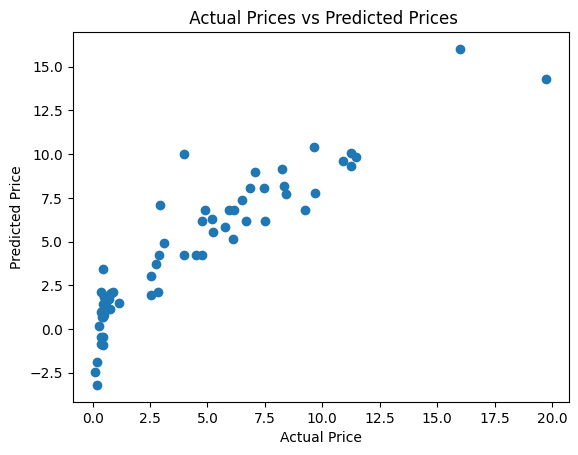

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

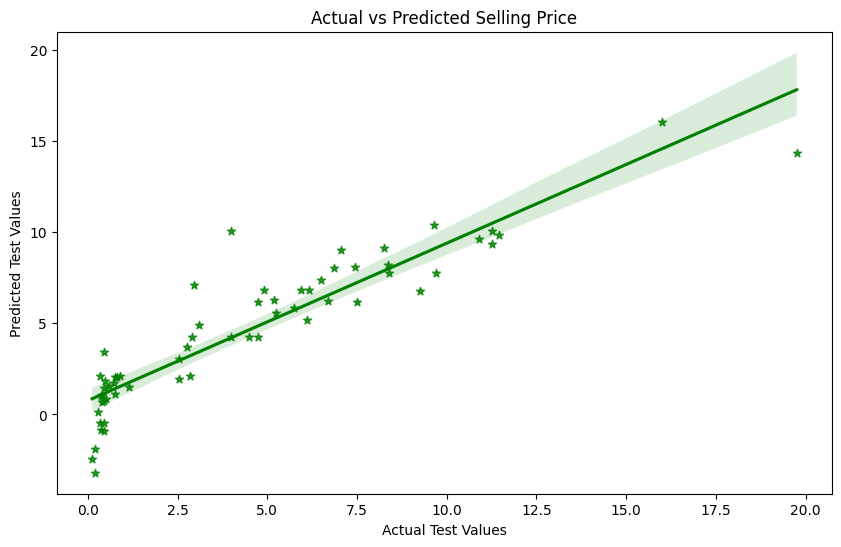

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test,y=lr_pred, color="green",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)
print(model.score(X_test, Y_test)*100)


95.75161566318684


In [ ]:
rf_pred=model.predict(X_test)

In [ ]:
performance(model,X_train,Y_train,rf_pred,Y_test)

Train Score: 0.9849476296066992
Test Score: 0.9575161566318684

MSE: 0.780278937213115
MAE: 0.49566393442622964


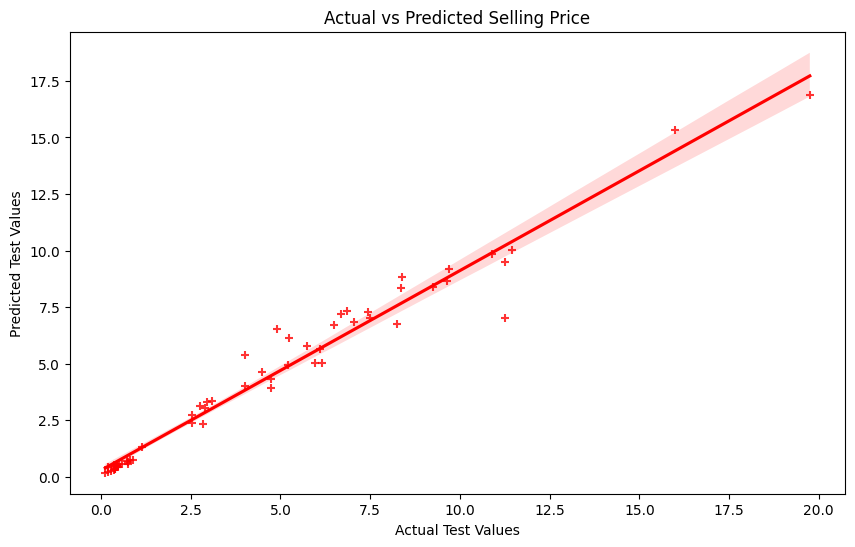

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test, y=rf_pred, color="red",marker="+",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

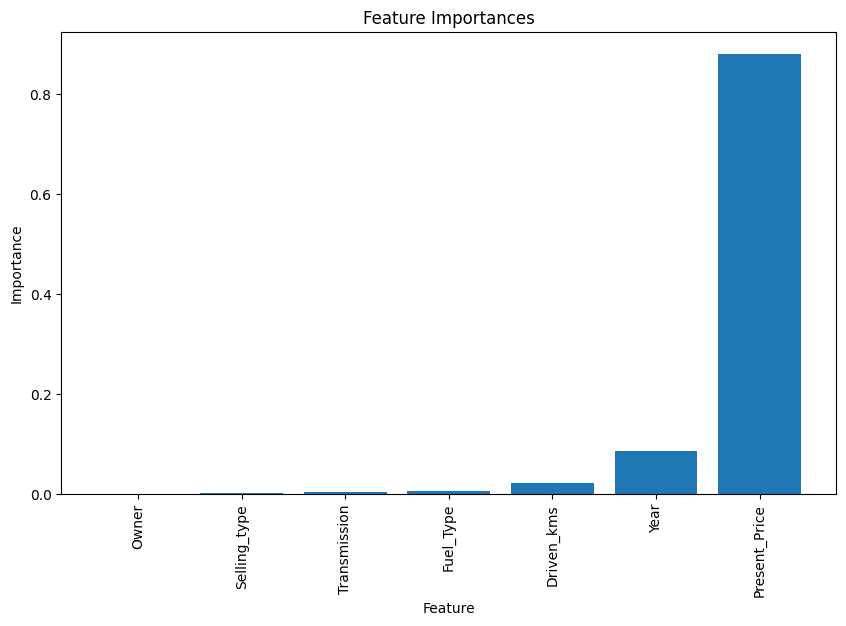

In [ ]:
import numpy as np
importances = model.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()